## 2DMatpedia Deep Learning

In [1]:
import json
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

In [2]:
materials = []
with open('Data.json', 'r') as file:
    for line in file:
        materials.append(json.loads(line))

print("Found %s materials" %len(materials)) 

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df= pd.DataFrame.from_dict(materials)
df.set_index('material_id', inplace=True)

df.head()

Found 6351 materials


,_id,sg_number,formula_pretty,nelements,creation_task_label,created_at,chemsys,discovery_process,formula_reduced_abc,sg_symbol,formula_anonymous,source_id,spacegroup,elements,_tasksbuilder,structure,bandstructure,bandgap,thermo,energy_vdw_per_atom,magnetism,total_magnetization,calc_settings,energy_per_atom,relative_id,decomposition_energy,exfoliation_energy_per_atom,literature_doi
material_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2dm-1,{'$oid': '5c135411b183da75a584848a'},164,IrF2,2,mp-30033_sub_round2highcri2-relax,{'$date': '2018-12-14T06:56:17.423Z'},F-Ir,bottom-up,F2 Ir1,P-3m1,AB2,mp-30033,"{'symbol': 'P-3m1', 'number': 164, 'point_grou...","[F, Ir]","{'all_task_ids': ['t-26040', 't-26043', 't-382...","{'lattice': {'a': 3.5192791400000005, 'c': 22....","{'bandgap': 0.0, 'cbm': None, 'vbm': None, 'is...",0.0000,"{'energy_vdw': -10.08505654, 'energy_vdw_per_a...",-3.361686,{'total_magnetization': 0.24874},0.248740,"{'is_hubbard': False, 'hubbards': {}, 'potcar_...",-4.536822,2dm-4963,0.799800,0.234617,NaN
2dm-2,{'$oid': '5c135411b183da75a584848b'},164,Ba2Sb,2,mp-1245_sub_round2highcri2-static,{'$date': '2018-12-14T06:56:17.504Z'},Ba-Sb,bottom-up,Ba2 Sb1,P-3m1,AB2,mp-1245,"{'symbol': 'P-3m1', 'number': 164, 'point_grou...","[Ba, Sb]","{'all_task_ids': ['t-26046', 't-26033', 't-382...","{'lattice': {'a': 4.953362, 'c': 22.747784, 'b...","{'bandgap': 0.0, 'cbm': None, 'vbm': None, 'is...",0.0000,"{'energy_vdw': -6.56098752, 'energy_vdw_per_at...",-2.186996,{'total_magnetization': 0.7488541},0.748854,"{'is_hubbard': False, 'hubbards': {}, 'potcar_...",-3.243794,2dm-3279,0.300023,0.210645,NaN
2dm-3,{'$oid': '5c135411b183da75a584848c'},2,TlS,2,mp-542812_sub_round2highcri2-relax,{'$date': '2018-12-14T06:56:17.530Z'},S-Tl,bottom-up,S1 Tl1,P-1,AB,mp-542812,"{'symbol': 'P-1', 'number': 2, 'point_group': ...","[S, Tl]","{'all_task_ids': ['t-26049', 't-26076', 't-381...","{'lattice': {'a': 4.008652948077889, 'c': 25.6...","{'bandgap': 0.9814000000000003, 'cbm': -2.6546...",0.9814,"{'energy_vdw': -26.77720289, 'energy_vdw_per_a...",-2.231434,{'total_magnetization': -0.0},-0.000000,"{'is_hubbard': False, 'hubbards': {}, 'potcar_...",-3.325673,2dm-5155,0.177412,0.095794,NaN
2dm-4,{'$oid': '5c135411b183da75a584848d'},166,MoCl2,2,mp-554340_sub_round2highcri2-static,{'$date': '2018-12-14T06:56:17.557Z'},Cl-Mo,bottom-up,Cl2 Mo1,R-3m,AB2,mp-554340,"{'symbol': 'R-3m', 'number': 166, 'point_group...","[Cl, Mo]","{'all_task_ids': ['t-25997', 't-25981', 't-381...","{'lattice': {'a': 3.166735, 'c': 21.4394194164...","{'bandgap': 0.0, 'cbm': None, 'vbm': None, 'is...",0.0000,"{'energy_vdw': -26.81824534, 'energy_vdw_per_a...",-4.469708,{'total_magnetization': 0.0},0.000000,"{'is_hubbard': False, 'hubbards': {}, 'potcar_...",-5.294281,2dm-4342,0.485815,-0.055818,NaN
2dm-6367,{'$oid': '5c135411b183da75a584848e'},164,IrO2,2,mvc-12841_sub_round2highcri2-static,{'$date': '2018-12-14T06:56:17.574Z'},Ir-O,bottom-up,Ir1 O2,P-3m1,AB2,mvc-12841,"{'symbol': 'P-3m1', 'number': 164, 'point_grou...","[Ir, O]","{'all_task_ids': ['t-26000', 't-25995', 't-381...","{'lattice': {'a': 3.155589, 'c': 21.887078, 'b...","{'bandgap': 0.0, 'cbm': None, 'vbm': None, 'is...",0.0000,"{'energy_vdw': -17.50786697, 'energy_vdw_per_a...",-5.835956,{'total_magnetization': 0.0887066},0.088707,"{'is_hubbard': False, 'hubbards': {}, 'potcar_...",-6.799664,2dm-4272,0.237090,NaN,NaN


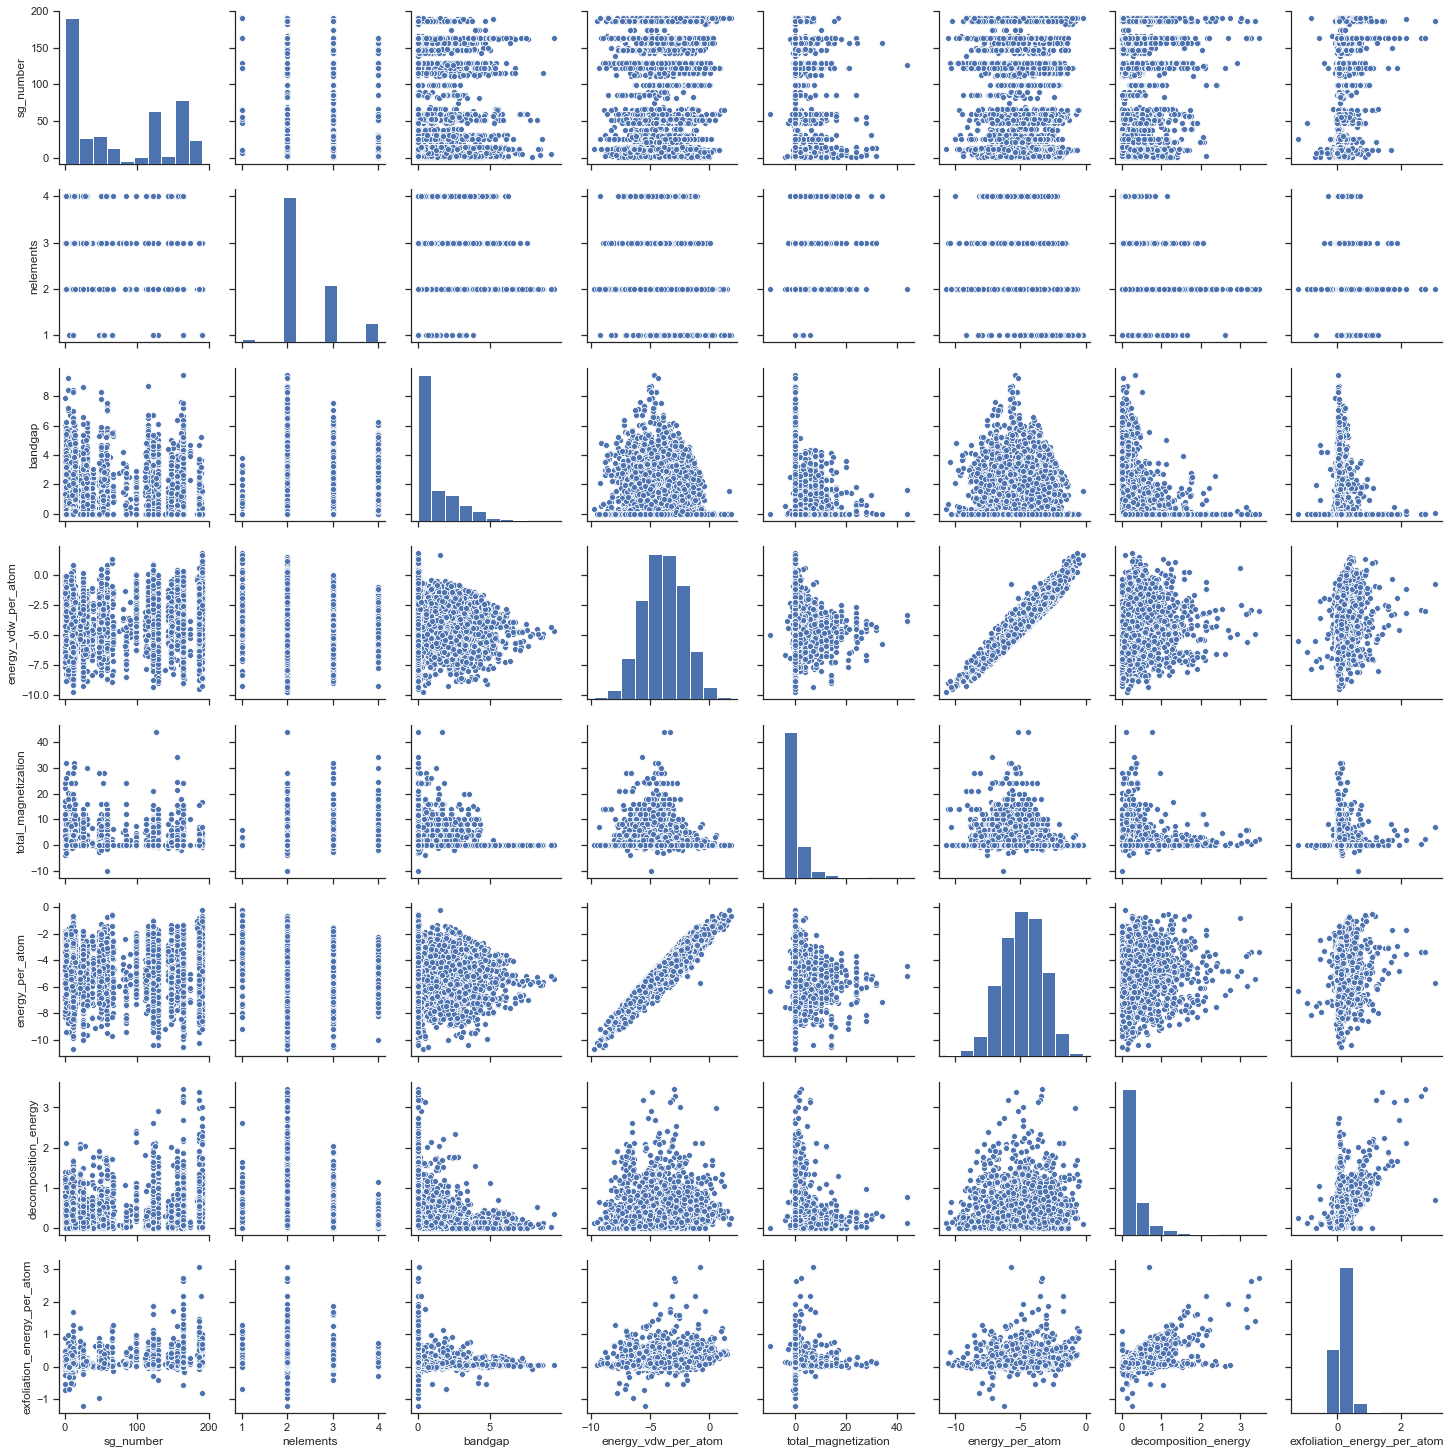

In [3]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)
#plt.show()
g.savefig("pairplot.png")

In [4]:
df= df.drop(["energy_vdw_per_atom"], axis=1)

In [5]:
from pymatgen import Composition
from matminer.featurizers.conversions import StrToComposition
stc= StrToComposition()
df= stc.featurize_dataframe(df, "formula_pretty")
from matminer.featurizers.composition import ValenceOrbital
vo= ValenceOrbital()
df= vo.featurize_dataframe(df, "composition")
from matminer.featurizers.composition import BandCenter
bc= BandCenter()
df= bc.featurize_dataframe(df, "composition")
from matminer.featurizers.composition import Stoichiometry
smet= Stoichiometry()
df= smet.featurize_dataframe(df, "composition")
from matminer.featurizers.composition import IonProperty
ip= IonProperty()
df= ip.featurize_dataframe(df, "composition")
from matminer.featurizers.composition import ElementFraction
ef= ElementFraction()
df= ef.featurize_dataframe(df, "composition")
from matminer.featurizers.conversions import CompositionToOxidComposition
ctoc= CompositionToOxidComposition()
df= ctoc.featurize_dataframe(df, "composition")
from matminer.featurizers.composition import OxidationStates
os= OxidationStates()
df= os.featurize_dataframe(df, "composition_oxid")
from matminer.featurizers.composition import YangSolidSolution
mg= YangSolidSolution()
df= mg.featurize_dataframe(df, "composition")

In [6]:
def number_of_atoms(formula):
    numberofatoms=[]
    
    for i in range(len(formula)):
        
        compound= formula[i]
        counter=0
        stringcounter=0
        numbercounter=0
        
        for v in range(0, len(compound)):
            
            if(compound[v].isnumeric()):
                counter= counter+ int(compound[v])
                numbercounter+=1
            else:
                if(compound[v].isupper()):
                    stringcounter+=1
                    
        counter= counter + stringcounter - numbercounter
        numberofatoms.append(counter)
        
    return numberofatoms

In [7]:
def number_of_magnetic_atoms(formula):
    
    magnetic_atoms= ["Fe", "Co", "Dy", "Sm", "Ni", "Gd", "Nd"]
    count=0
    tr=0
    numberofmagneticatoms=[]
    
    for i in range(len(formula)):
        
        compound= formula[i]
        count=0
        
        for j in range(0, len(magnetic_atoms)):
            
            if magnetic_atoms[j] in compound:
                pos= compound.index(magnetic_atoms[j])
                if(pos+2 != len(compound)): #here each of the magnetic_atoms has a short form of 2 characters
                    if(compound[pos+2].isnumeric()):
                        count= count + int(compound[pos+2])
                    else:
                        count= count+1
                else:
                    count= count+1
                    
        numberofmagneticatoms.append(count)
        
    return numberofmagneticatoms 

In [8]:
numberofatoms= number_of_atoms(df['formula_pretty'])
numberofmagneticatoms= number_of_magnetic_atoms(df['formula_pretty'])
df.insert(5, "number_of_magnetic_atoms", numberofmagneticatoms, True)
df.insert(6, "number_of_atoms", numberofatoms, True)

In [9]:
x= df.drop(["creation_task_label", "magnetism", "created_at", "_id", "source_id", "literature_doi", "formula_pretty", "relative_id", "chemsys", "discovery_process", "formula_reduced_abc", "sg_symbol", "formula_anonymous", "spacegroup", "elements", "_tasksbuilder", "bandstructure", "structure", "thermo", "calc_settings", "composition", "compound possible", "Yang delta", "composition_oxid"], axis=1)

In [10]:
x= x.dropna()

In [11]:
x.shape

(4401, 134)

In [12]:
count = (x.nunique())
print(count)
to_del = [i for i,v in enumerate(count) if v == 1]
print("Columns to delete:", to_del)

for i in range(len(to_del)):
    t= to_del[i]
    x.drop(x.columns[t-i], axis=1, inplace=True)

sg_number                        67
nelements                         4
number_of_magnetic_atoms          6
number_of_atoms                  19
bandgap                        2561
total_magnetization            1830
energy_per_atom                4401
decomposition_energy           3770
exfoliation_energy_per_atom    4401
avg s valence electrons          73
avg p valence electrons         207
avg d valence electrons         304
avg f valence electrons         110
frac s valence electrons        738
frac p valence electrons        891
frac d valence electrons        882
frac f valence electrons        349
band center                    3096
0-norm                            4
2-norm                          174
3-norm                          186
5-norm                          191
7-norm                          189
10-norm                         189
max ionic char                  378
avg ionic char                 2563
H                                40
He                          

In [13]:
def create_bins(lower_bound, width, quantity):
    
    bins=[]
    
    for i in range(quantity):
        if i == quantity-1:
            bins.append((lower_bound+i*width, lower_bound+(i+1)*width+0.1))
        else:
            bins.append((lower_bound+i*width, lower_bound+(i+1)*width))
        
    return bins

In [14]:
def find_bin(value, bins):
    
    for i in range(0, len(bins)):
        if bins[i][0] <= value < bins[i][1]:
            return i
    
    print("error in making bins") #it must fit in atleast one bins

In [15]:
def binning():
    
    #Using Sturge's Rule for bin calculation
    k= math.ceil(1+ math.log2(len(x)))
    column_names=list(x.columns.values)
    
    binned_x= pd.DataFrame()
    
    for i in range(len(column_names)):
        
        if(x.columns[i]=="total_magnetization"):
            binned_x.insert(0, x.columns[i], x[column_names[i]].tolist(), True)
            continue
        columns_into_list= x[column_names[i]].tolist()
        lower_bound= min(columns_into_list)
        upper_bound= max(columns_into_list)
        width= (upper_bound - lower_bound)/k
        bins= create_bins(lower_bound, width, k)

        t=[]
        for j in range (len(columns_into_list)):
            t.append(find_bin(columns_into_list[j], bins))
        
        binned_x.insert(0, x.columns[i], t, True)
    
    return binned_x

In [16]:
binned_x= binning()
binned_x.head()

,Yang omega,std_dev oxidation state,range oxidation state,maximum oxidation state,minimum oxidation state,Pu,Np,U,Pa,Th,Bi,Pb,Tl,Hg,Au,Pt,Ir,Os,Re,W,Ta,Hf,Lu,Yb,Tm,Er,Ho,Dy,Tb,Gd,Eu,Sm,Nd,Pr,Ce,La,Ba,I,Te,Sb,Sn,In,Cd,Ag,Pd,Rh,Ru,Tc,Mo,Nb,Zr,Y,Sr,Rb,Br,Se,As,Ge,Ga,Zn,Cu,Ni,Co,Fe,Mn,Cr,V,Ti,Sc,Ca,K,Cl,S,P,Si,Al,Mg,Na,F,O,N,C,B,Be,Li,H,avg ionic char,max ionic char,10-norm,7-norm,5-norm,3-norm,2-norm,0-norm,band center,frac f valence electrons,frac d valence electrons,frac p valence electrons,frac s valence electrons,avg f valence electrons,avg d valence electrons,avg p valence electrons,avg s valence electrons,exfoliation_energy_per_atom,decomposition_energy,energy_per_atom,total_magnetization,bandgap,number_of_atoms,number_of_magnetic_atoms,nelements,sg_number
0,3,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,7,8,7,7,7,6,6,4,3,7,2,5,2,4,3,9,13,4,3,8,0.248740,0,1,0,4,12
1,0,0,0,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,7,7,7,6,6,4,12,0,7,3,4,0,4,2,13,4,1,10,0.748854,0,1,0,4,12
2,1,2,2,1,10,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,4,4,5,5,5,4,8,8,4,2,1,7,7,7,13,4,0,10,-0.000000,1,0,0,4,0
3,4,3,3,3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,7,7,7,6,6,4,5,0,3,9,3,0,2,9,11,3,1,7,0.000000,0,1,0,4,12
4,4,3,3,3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,7,6,6,4,6,0,9,4,1,0,12,9,11,4,0,9,0.000000,1,1,0,4,12


In [17]:
normalised_x= binned_x.div(13)
normalised_x.head()

,Yang omega,std_dev oxidation state,range oxidation state,maximum oxidation state,minimum oxidation state,Pu,Np,U,Pa,Th,Bi,Pb,Tl,Hg,Au,Pt,Ir,Os,Re,W,Ta,Hf,Lu,Yb,Tm,Er,Ho,Dy,Tb,Gd,Eu,Sm,Nd,Pr,Ce,La,Ba,I,Te,Sb,Sn,In,Cd,Ag,Pd,Rh,Ru,Tc,Mo,Nb,Zr,Y,Sr,Rb,Br,Se,As,Ge,Ga,Zn,Cu,Ni,Co,Fe,Mn,Cr,V,Ti,Sc,Ca,K,Cl,S,P,Si,Al,Mg,Na,F,O,N,C,B,Be,Li,H,avg ionic char,max ionic char,10-norm,7-norm,5-norm,3-norm,2-norm,0-norm,band center,frac f valence electrons,frac d valence electrons,frac p valence electrons,frac s valence electrons,avg f valence electrons,avg d valence electrons,avg p valence electrons,avg s valence electrons,exfoliation_energy_per_atom,decomposition_energy,energy_per_atom,total_magnetization,bandgap,number_of_atoms,number_of_magnetic_atoms,nelements,sg_number
0,0.230769,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.692308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.692308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538462,0.615385,0.538462,0.538462,0.538462,0.461538,0.461538,0.307692,0.230769,0.538462,0.153846,0.384615,0.153846,0.307692,0.230769,0.692308,1.000000,0.307692,0.230769,0.615385,0.019134,0.000000,0.076923,0.0,0.307692,0.923077
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.692308,0.000000,0.0,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307692,0.307692,0.538462,0.538462,0.538462,0.461538,0.461538,0.307692,0.923077,0.000000,0.538462,0.230769,0.307692,0.000000,0.307692,0.153846,1.000000,0.307692,0.076923,0.769231,0.057604,0.000000,0.076923,0.0,0.307692,0.923077
2,0.076923,0.153846,0.153846,0.076923,0.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538462,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.538462,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230769,0.230769,0.307692,0.307692,0.384615,0.384615,0.384615,0.307692,0.615385,0.615385,0.307692,0.153846,0.076923,0.538462,0.538462,0.538462,1.000000,0.307692,0.000000,0.769231,-0.000000,0.076923,0.000000,0.0,0.307692,0.000000
3,0.307692,0.230769,0.230769,0.230769,0.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.692308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.692308,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230769,0.230769,0.538462,0.538462,0.538462,0.461538,0.461538,0.307692,0.384615,0.000000,0.230769,0.692308,0.230769,0.000000,0.153846,0.692308,0.846154,0.230769,0.076923,0.538462,0.000000,0.000000,0.076923,0.0,0.307692,0.923077
4,0.307692,0.230769,0.230769,0.230769,0.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.692308,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.692308,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.538462,0.538462,0.538462,0.461538,0.461538,0.307692,0.461538,0.000000,0.692308,0.307692,0.076923,0.000000,0.923077,0.692308,0.846154,0.307692,0.000000,0.692308,0.000000,0.076923,0.076923,0

In [18]:
normalised_x["total_magnetization"]= 13*normalised_x["total_magnetization"]
normalised_x.head()

,Yang omega,std_dev oxidation state,range oxidation state,maximum oxidation state,minimum oxidation state,Pu,Np,U,Pa,Th,Bi,Pb,Tl,Hg,Au,Pt,Ir,Os,Re,W,Ta,Hf,Lu,Yb,Tm,Er,Ho,Dy,Tb,Gd,Eu,Sm,Nd,Pr,Ce,La,Ba,I,Te,Sb,Sn,In,Cd,Ag,Pd,Rh,Ru,Tc,Mo,Nb,Zr,Y,Sr,Rb,Br,Se,As,Ge,Ga,Zn,Cu,Ni,Co,Fe,Mn,Cr,V,Ti,Sc,Ca,K,Cl,S,P,Si,Al,Mg,Na,F,O,N,C,B,Be,Li,H,avg ionic char,max ionic char,10-norm,7-norm,5-norm,3-norm,2-norm,0-norm,band center,frac f valence electrons,frac d valence electrons,frac p valence electrons,frac s valence electrons,avg f valence electrons,avg d valence electrons,avg p valence electrons,avg s valence electrons,exfoliation_energy_per_atom,decomposition_energy,energy_per_atom,total_magnetization,bandgap,number_of_atoms,number_of_magnetic_atoms,nelements,sg_number
0,0.230769,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.692308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.692308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538462,0.615385,0.538462,0.538462,0.538462,0.461538,0.461538,0.307692,0.230769,0.538462,0.153846,0.384615,0.153846,0.307692,0.230769,0.692308,1.000000,0.307692,0.230769,0.615385,0.248740,0.000000,0.076923,0.0,0.307692,0.923077
1,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.692308,0.000000,0.0,0.307692,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.307692,0.307692,0.538462,0.538462,0.538462,0.461538,0.461538,0.307692,0.923077,0.000000,0.538462,0.230769,0.307692,0.000000,0.307692,0.153846,1.000000,0.307692,0.076923,0.769231,0.748854,0.000000,0.076923,0.0,0.307692,0.923077
2,0.076923,0.153846,0.153846,0.076923,0.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.538462,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.538462,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230769,0.230769,0.307692,0.307692,0.384615,0.384615,0.384615,0.307692,0.615385,0.615385,0.307692,0.153846,0.076923,0.538462,0.538462,0.538462,1.000000,0.307692,0.000000,0.769231,-0.000000,0.076923,0.000000,0.0,0.307692,0.000000
3,0.307692,0.230769,0.230769,0.230769,0.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.692308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.692308,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.230769,0.230769,0.538462,0.538462,0.538462,0.461538,0.461538,0.307692,0.384615,0.000000,0.230769,0.692308,0.230769,0.000000,0.153846,0.692308,0.846154,0.230769,0.076923,0.538462,0.000000,0.000000,0.076923,0.0,0.307692,0.923077
4,0.307692,0.230769,0.230769,0.230769,0.769231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.692308,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.692308,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.538462,0.538462,0.538462,0.461538,0.461538,0.307692,0.461538,0.000000,0.692308,0.307692,0.076923,0.000000,0.923077,0.692308,0.846154,0.307692,0.000000,0.692308,0.000000,0.076923,0.076923,0

In [122]:
x.shape

(4401, 112)

In [123]:
random_x= normalised_x.sample(frac=1)


In [124]:
y= random_x["total_magnetization"]
x= random_x.drop(["total_magnetization"], axis=1)

In [125]:
temp=y
y= np.where(y==0, 0, 1)

In [126]:
#varying 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)


In [48]:
y_test.shape

(1321,)

In [55]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Epoch 1/75
308/308 [==============================] - 0s 1ms/step - loss: 0.6921 - accuracy: 0.5188
Epoch 2/75
308/308 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.5214
Epoch 3/75
308/308 [==============================] - 0s 1ms/step - loss: 0.6119 - accuracy: 0.7929
Epoch 4/75
308/308 [==============================] - 0s 1ms/step - loss: 0.5735 - accuracy: 0.8575
Epoch 5/75
308/308 [==============================] - 0s 1ms/step - loss: 0.5395 - accuracy: 0.8734
Epoch 6/75
308/308 [==============================] - 0s 1ms/step - loss: 0.5093 - accuracy: 0.8828
Epoch 7/75
308/308 [==============================] - 0s 1ms/step - loss: 0.4812 - accuracy: 0.8893
Epoch 8/75
308/308 [==============================] - 0s 1ms/step - loss: 0.4559 - accuracy: 0.8922
Epoch 9/75
308/308 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.8974
Epoch 10/75
308/308 [==============================] - 0s 1ms/step - loss: 0.4138 - accuracy: 0.8981

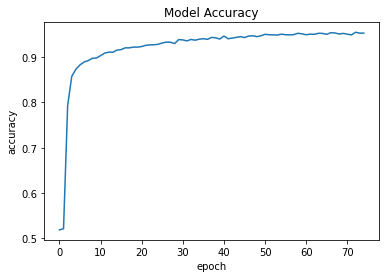

In [79]:
#better performance with relu activation
#systematic experimation but for a more comprehensive one
n=9
classifier = Sequential()
classifier.add(Dense(n, kernel_initializer = "uniform",activation = "relu", input_dim=111))
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))
classifier.add(Dense(1, kernel_initializer = "uniform",activation = "sigmoid"))
classifier.compile(optimizer= "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
history= classifier.fit(X_train, y_train, batch_size = 10, epochs = 75)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig("ma.png")

In [71]:
plt.savefig("ma.png")

<Figure size 432x288 with 0 Axes>

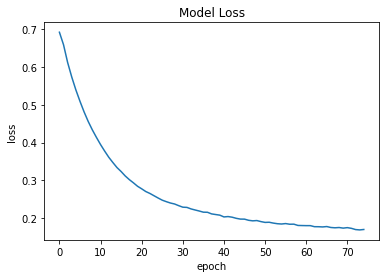

In [80]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig("ml.png")

In [33]:
#bacth size
#epoch_size
#optimiser
#classifier
NODES
#neural networks

In [42]:
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 9)                 1008      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 10        
Total params: 1,018
Trainable params: 1,018
Non-trainable params: 0
_________________________________________________________________


In [45]:
classifier.evaluate(X_test, y_test)

42/42 [==============================] - 0s 3ms/step - loss: 0.3046 - accuracy: 0.8895


[0.30455026030540466, 0.8894776701927185]

In [49]:
y_test

array([1, 0, 1, ..., 0, 1, 0])

In [ ]:
Batch Size
epoch

In [61]:
pleasework= classifier.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [86]:
len(pleasework)
listlist=[]
for i in range (len(pleasework)):
    listlist.append(pleasework[i][0])

In [66]:


# parameters
# experimentation


In [85]:
pleasework[0][0]

1

In [87]:
listlist

[1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,


In [89]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(listlist, y_test)

In [90]:
cm

array([[508,  82],
       [ 77, 654]])

In [92]:
classifier.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 9)                 1008      
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 10        
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 2         
Total params: 1,020
Trainable params: 1,020
Non-trainable params: 0
_________________________________________________________________


In [146]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [147]:
inputs = keras.Input(shape=(111,))

In [148]:
img_inputs = keras.Input(shape=(32, 32, 3))

In [149]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [150]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [151]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [152]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 111)]             0         
_________________________________________________________________
dense_58 (Dense)             (None, 64)                7168      
_________________________________________________________________
dense_59 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_60 (Dense)             (None, 10)                650       
Total params: 11,978
Trainable params: 11,978
Non-trainable params: 0
_________________________________________________________________


In [153]:
#x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#x_train = x_train.reshape(60000, 784).astype("float32") / 255
#x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, batch_size=64, epochs=75)

test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/75
49/49 [==============================] - 0s 4ms/step - loss: 0.9675 - accuracy: 0.6325
Epoch 2/75
49/49 [==============================] - 0s 4ms/step - loss: 0.5308 - accuracy: 0.7802
Epoch 3/75
49/49 [==============================] - 0s 3ms/step - loss: 0.4427 - accuracy: 0.8081
Epoch 4/75
49/49 [==============================] - 0s 2ms/step - loss: 0.3914 - accuracy: 0.8289
Epoch 5/75
49/49 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 0.8438
Epoch 6/75
49/49 [==============================] - 0s 2ms/step - loss: 0.3443 - accuracy: 0.8513
Epoch 7/75
49/49 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8510
Epoch 8/75
49/49 [==============================] - 0s 3ms/step - loss: 0.3225 - accuracy: 0.8597
Epoch 9/75
49/49 [==============================] - 0s 2ms/step - loss: 0.3161 - accuracy: 0.8581
Epoch 10/75
49/49 [==============================] - 0s 2ms/step - loss: 0.3081 - accuracy: 0.8662
Epoch 11/75
49/49 [

In [154]:
#functional API

dict_keys(['loss', 'accuracy'])


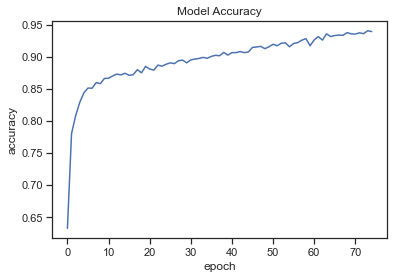

In [155]:
#history= model.fit(X_train, y_train, batch_size = 10, epochs = 75)
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.savefig("ma.png")

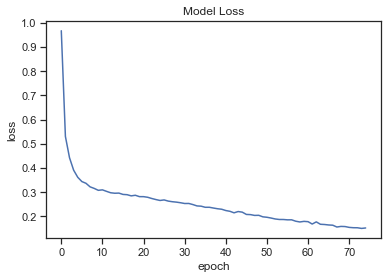

In [156]:
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.savefig("ml.png")

In [157]:
from eli5.sklearn import PermutationImportance


ModuleNotFoundError: No module named 'eli5'

In [158]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 111)]             0         
_________________________________________________________________
dense_58 (Dense)             (None, 64)                7168      
_________________________________________________________________
dense_59 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_60 (Dense)             (None, 10)                650       
Total params: 11,978
Trainable params: 11,978
Non-trainable params: 0
_________________________________________________________________


In [161]:
keras.utils.plot_model(model, "my_first_model.png")

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [160]:
pip install pydot


Note: you may need to restart the kernel to use updated packages.
